In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from bnn import bnn, NLL, dense_normal_fn


plt.style.use(('seaborn-white', 'seaborn-talk', 'seaborn-deep'))

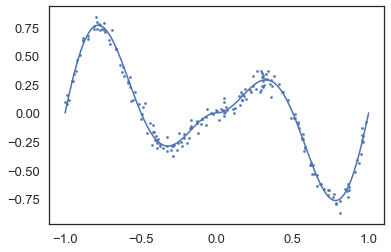

In [2]:
n = 200

f = lambda x: np.power(np.abs(x), 1.0) * np.sin(2 * np.pi * x)

x_min, x_max = -1, 1

x = np.random.uniform(low=x_min, high=x_max, size=(n, 1)).astype(np.float32)
y = f(x) + 0.05 * np.random.normal(size=(n, 1))

x_ = np.linspace(x_min, x_max, 200, dtype=np.float32).reshape(-1, 1)
y_ = f(x_)

plt.plot(x_, y_, lw=1.5)
plt.scatter(x, y, s=5)
plt.show()

In [4]:
model.layers[0].trainable_weights

[<tf.Variable 'dense_variational/constant:0' shape=(200,) dtype=float32, numpy=
 array([ 0.1116112 , -0.10321666,  0.06069733,  0.07385559,  0.17056318,
        -0.13458416, -0.22515288, -0.03266661, -0.15150449,  0.04914953,
        -0.15047333,  0.00248395,  0.11554416, -0.2306661 ,  0.22963475,
         0.20404334, -0.20032056,  0.20916508,  0.1735806 , -0.10627486,
        -0.14194873, -0.206974  ,  0.23892625, -0.00905737,  0.14782394,
        -0.11519849, -0.14382981,  0.15207617, -0.02806991, -0.07459165,
        -0.235608  , -0.2381476 ,  0.07713623,  0.17321064, -0.07864535,
        -0.05308764, -0.16669187, -0.0158484 ,  0.11410595, -0.08215638,
        -0.23989815,  0.06348319,  0.05148478, -0.12101343, -0.11487888,
        -0.01868117, -0.19236316, -0.00954379,  0.22227047, -0.19007276,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.       

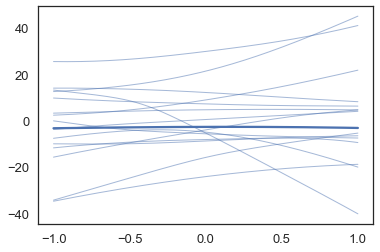

In [3]:
model = bnn((1, 50, 10, 1), variational_params=None, prior_params=[None, 0.1, None, 0.1])

yhats = np.asarray([model(x_).mean().numpy().squeeze() for _ in range(100)])
yhat = yhats.mean(axis=0)
sigma_y = yhats.std(axis=0)

c = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
plt.plot(x_, yhat, c=c)
for i in range(15):
    plt.plot(x_, yhats[i], c=c, lw=1, alpha=0.5)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_variational_3 (DenseVa (None, 50)                300       
_________________________________________________________________
dense_variational_4 (DenseVa (None, 10)                1530      
_________________________________________________________________
dense_variational_5 (DenseVa (None, 1)                 33        
_________________________________________________________________
distribution_lambda_1 (Distr ((None, 1), (None, 1))    0         
Total params: 1,863
Trainable params: 1,863
Non-trainable params: 0
_________________________________________________________________
Train for 1000 steps
Epoch 1/30
1000/1000 [==============================] - 3s 3ms/step - loss: 53.4618
Epoch 2/30
1000/1000 [==============================] - 2s 2ms/step - loss: 13.5487
Epoch 3/30
1000/1000 [==============================] - 2s 2m

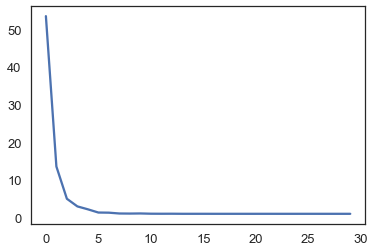

In [5]:
model = bnn((1, 50, 10, 1),
#             variational_params=[None, 1e-7, None, 1e-7],
            variational_params=None,
            prior_params=[None, 1.0, None, 1.0],
            activation=tf.nn.softplus,
#             kl_weight=1.0/x.shape[0]
            kl_weight=0.0
        )
model.summary()

loss = NLL()
opt = tf.keras.optimizers.Adam()
# opt = tf.keras.optimizers.Adadelta(0.1)

model.compile(loss=loss, optimizer=opt)

dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.repeat().batch(x.shape[0])

results = model.fit(dataset, steps_per_epoch=1000, epochs=30)

plt.plot(results.history['loss'])

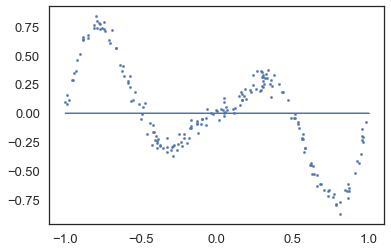

In [6]:
yhats = np.asarray([model(x_).mean().numpy().squeeze() for _ in range(100)])
yhat = yhats.mean(axis=0)
sigma_y = yhats.std(axis=0)

c = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
# plt.plot(x_, yhat, c=c)
for i in range(15):
    plt.plot(x_, yhats[i], c=c, lw=1, alpha=0.5)
plt.scatter(x, y, s=5)

In [7]:
model.layers[0].trainable_variables

[<tf.Variable 'dense_variational_3/constant:0' shape=(200,) dtype=float32, numpy=
 array([ 0.20766148, -0.19201955, -0.03740026, -0.00349294, -0.04834874,
        -0.1522666 ,  0.05024445, -0.06943092,  0.03982794,  0.0305719 ,
        -0.06620423, -0.05072848, -0.2562402 ,  0.13166773,  0.01884023,
        -0.04095627, -0.20156775,  0.07159736, -0.04917719, -0.0269931 ,
         0.0815611 ,  0.06114481,  0.05903512,  0.18443634, -0.10632339,
        -0.10209386,  0.13830107,  0.06671002, -0.11304112, -0.00265642,
         0.16317345,  0.07670705,  0.1165207 ,  0.07695432,  0.113919  ,
        -0.04968954,  0.10924724,  0.26696888,  0.0500716 ,  0.03400651,
        -0.09103127, -0.00379049,  0.05938965,  0.06973083, -0.14744405,
         0.12935683,  0.07428109,  0.05780903,  0.09479522, -0.04175705,
        -0.2267598 , -0.20240821, -0.31478828, -0.2786739 , -0.23209225,
        -0.13925165, -0.32335705, -0.32699573, -0.2730777 , -0.1562084 ,
        -0.36245283, -0.24599877, -0.16715

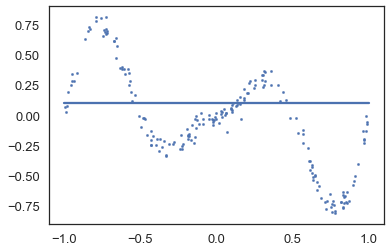

In [46]:
yhat = model(x_).mean().numpy().squeeze()

plt.scatter(x, y, s=5)
plt.plot(x_, yhat)